# Detección de objetos - Equipo 512 - M.P.I - 07/12/2023.

### Integrantes:
- Carapia Barcena Mauricio Javier.
- Landeros Castellanos Jared Noe.
- Martínez Arroyo Edgar Rodrigo.
- Peña Bravo María Cecilia.
- Romero Olaéz Gustavo.

## Modelo MLP

c:\Users\El Rorro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
 [[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

     Circles       1.00      1.00      1.00        11
  Rectangles       1.00      1.00      1.00         9
   Triangles       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



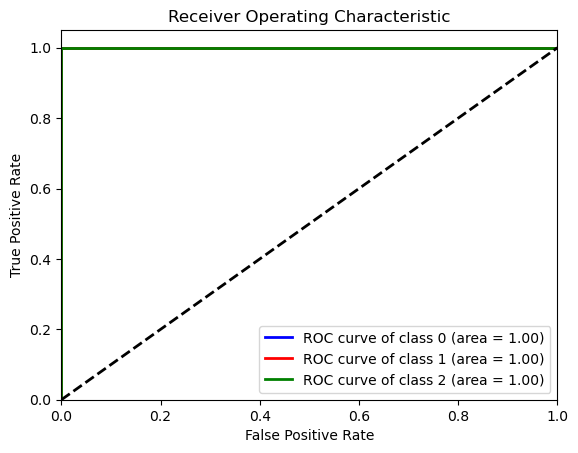

In [2]:

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Load data
data = pd.read_csv('Combinado.csv')

# Selecting features and target
X = data[['eccentricity', 'extent']]  # Assuming the column names are 'Excentricidad' and 'Alcance'
y = data['Category']  # Assuming the target column is 'Etiqueta'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

# Predictions
predictions = mlp.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, predictions)
print('\nClassification Report:\n', class_report)

# ROC Curve
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y.nunique()

# Convert to binary indicators
y_test_bin = pd.get_dummies(y_test)
predictions_bin = pd.get_dummies(predictions)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], predictions_bin.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curve
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Funcion prueba

In [3]:
def predict_specific_pattern(mlp_model, eccentricity, extent):
    """
    Function to predict the category of a given pattern using the trained MLP model, 
    specifically for features 'eccentricity' and 'extent'.

    Parameters:
    mlp_model (MLPClassifier): The trained MLP classifier model.
    eccentricity (float): The value of the eccentricity feature.
    extent (float): The value of the extent feature.

    Returns:
    prediction: The predicted category of the input pattern.
    """

    # Creating a DataFrame or 2D array for the input features
    input_features = [[eccentricity, extent]]

    # Making a prediction using the MLP model
    prediction = mlp_model.predict(input_features)

    return prediction[0]


In [9]:
figura_predicha1 = predict_specific_pattern(mlp,0.9108048305240386,0.4561637739207833)
print(f'La figura 1 predicha es: {figura_predicha1}')

figura_predicha2 = predict_specific_pattern(mlp,0,0.8108419838523645)
print(f'La figura 2 predicha es: {figura_predicha2}')

figura_predicha3 = predict_specific_pattern(mlp,0.8400689868456491,1)
print(f'La figura 3 predicha es: {figura_predicha3}')

La figura 1 predicha es: Triangles
La figura 2 predicha es: Circles
La figura 3 predicha es: Rectangles


c:\Users\El Rorro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\El Rorro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\El Rorro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
